In [5]:
# KNN Classifier
# K Nearest Neighbours
# K= No.of nearest neighbour

# Values Of k is chosen based on some of the below guidelines
# k>1
# avoid k=even
# Take the k values as nearer to sq.root of total no.of data points

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KNN Classifier.csv")
df

,Weight(x2)kg,Height(y2)cm,Class
0,51kg,167cm,Underweight
1,66kg,177cm,Normal
2,75kg,169cm,Overweight
3,69kg,176cm,Normal
4,50kg,173cm,Underweight
5,82kg,170cm,Overweight
6,65kg,172cm,Normal
7,58kg,180cm,Underweight
8,68kg,162cm,Overweight
9,63kg,165cm,Normal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     object
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [9]:
a='51kg'

In [10]:
a.replace("kg",'')

'51'

In [11]:
(lambda a:a.replace("kg",''))

<function __main__.<lambda>(a)>

In [12]:
# df['Weight(x2)kg']
df['Weight(x2)kg']=df['Weight(x2)kg'].apply((lambda a:a.replace("kg",''))).astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     object
 2   Class         25 non-null     object
dtypes: int64(1), object(2)
memory usage: 728.0+ bytes


In [14]:
df['Height(y2)cm']=df['Height(y2)cm'].apply((lambda a:a.replace("cm",''))).astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Weight(x2)kg  25 non-null     int64 
 1   Height(y2)cm  25 non-null     int64 
 2   Class         25 non-null     object
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [16]:
df

,Weight(x2)kg,Height(y2)cm,Class
0,51,167,Underweight
1,66,177,Normal
2,75,169,Overweight
3,69,176,Normal
4,50,173,Underweight
5,82,170,Overweight
6,65,172,Normal
7,58,180,Underweight
8,68,162,Overweight
9,63,165,Normal


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Weight(x2)kg    0
Height(y2)cm    0
Class           0
dtype: int64

In [19]:
df.describe()

,Weight(x2)kg,Height(y2)cm
count,25.00000,25.000000
mean,64.44000,172.480000
std,9.62237,6.532738
min,50.00000,162.000000
25%,57.00000,168.000000
50%,65.00000,173.000000
75%,72.00000,178.000000
max,82.00000,183.000000


In [20]:
# X =df[['Weight(x2)kg','Height(y2)cm']].values
# y = df['Class'].values
X=df.iloc[:,[0,1]].values
y=df.iloc[:,2].values


In [21]:
k=5

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=k,metric='euclidean')

In [23]:
model.fit(X,y)

KNeighborsClassifier(metric='euclidean')

In [24]:
pred=[[71.7,164.3]]
model.predict(pred)

array(['Overweight'], dtype=object)

In [25]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [26]:
model.kneighbors(pred,k)

(array([[1.33416641, 4.35660418, 5.74282161, 6.70671305, 7.65375725]]),
 array([[19,  8,  2, 12, 13]]))

In [27]:
model.kneighbors_graph(pred,k).toarray()

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [28]:
model.predict_proba(pred)

array([[0.2, 0.8, 0. ]])

In [29]:
df1=df[df['Class']=="Normal"]
df2=df[df['Class']=="Overweight"]
df3=df[df['Class']=="Underweight"]

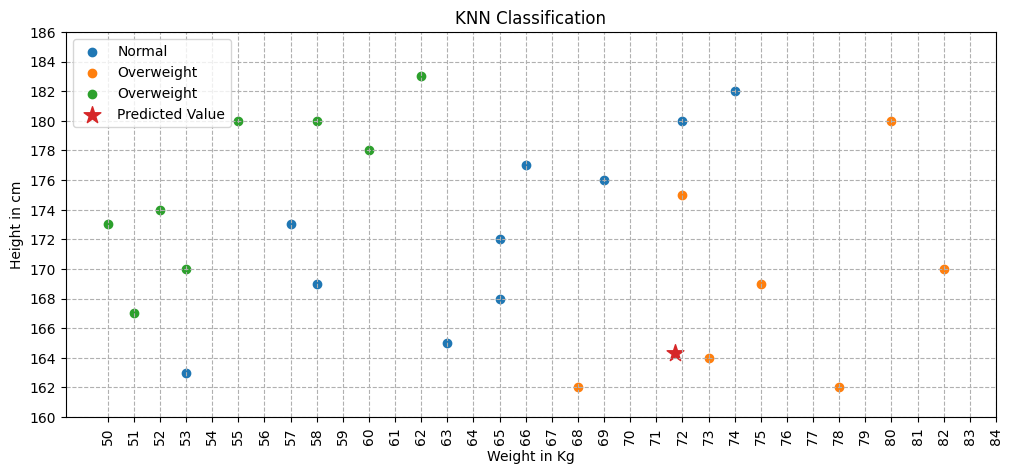

In [30]:
plt.figure(figsize=(12,5))
plt.scatter(df1['Weight(x2)kg'],df1['Height(y2)cm'],label="Normal")
plt.scatter(df2['Weight(x2)kg'],df2['Height(y2)cm'],label="Overweight")
plt.scatter(df3['Weight(x2)kg'],df3['Height(y2)cm'],label="Overweight")
plt.scatter(pred[0][0],pred[0][1],marker="*",label="Predicted Value",s=160)
plt.legend()
plt.grid(linestyle='dashed')
plt.xlabel("Weight in Kg")
plt.ylabel("Height in cm")
plt.title("KNN Classification")
plt.xticks(np.arange(50,85,1),rotation=90)
plt.yticks(np.arange(160,187,2))
plt.show()

In [31]:
pred

[[71.7, 164.3]]

In [32]:
pred[0]

[71.7, 164.3]

In [33]:
pred[0][0]

71.7

In [34]:
pred[0][1]

164.3

In [35]:
# Evaluation metrics for Classification
# Accuracy Score
# Confusion Matrix
# Classification Report
# Precision score
# Recall Score
# F1 Score
# AUC ROC

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [37]:
y_p=model.predict(X)
y_p

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Underweight', 'Overweight',
       'Underweight', 'Normal', 'Normal', 'Normal', 'Underweight'],
      dtype=object)

In [38]:
y

array(['Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Overweight', 'Normal', 'Underweight', 'Overweight', 'Normal',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight',
       'Normal', 'Overweight', 'Underweight', 'Normal', 'Overweight',
       'Underweight', 'Normal', 'Overweight', 'Normal', 'Underweight'],
      dtype=object)

In [39]:
accuracy_score(y,y_p)

0.92

In [40]:
confusion_matrix(y,y_p)

array([[9, 0, 1],
       [1, 6, 0],
       [0, 0, 8]])

In [41]:
print(classification_report(y,y_p))

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90        10
  Overweight       1.00      0.86      0.92         7
 Underweight       0.89      1.00      0.94         8

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [45]:
pd.DataFrame(confusion_matrix(y,y_p),index=['Normal_A','Overweight_A','Underweight_A'],
             columns=['Normal_P','Overweight_P','Underweight_P'])

,Normal_P,Overweight_P,Underweight_P
Normal_A,9,0,1
Overweight_A,1,6,0
Underweight_A,0,0,8


In [46]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [47]:
import joblib
joblib.dump(model,'knn_model')


['knn_model']

In [51]:
%%writefile app.py
import streamlit as st
import joblib
model=joblib.load("knn_model")
st.title("KNN Classifier")
Weight=st.number_input("Enter the weight(in Kg)",min_value=45,max_value=95,value=65,stop=1)
Height=st.number_input("Enter the height(in Kg)",min_value=140,max_value=190,value=155,stop=1)

if st.button("PREDICT"):
  model.predict([[weight,height]])
  st.subheader("The person weight "+str(weight)+"kg and having a height of "+str(height)+
  "cm is categorized as "+str(op[0])+".")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.69.109:8501

npx: installed 22 in 2.958s
your url is: https://some-singers-report.loca.lt
